In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Sales.csv")

In [3]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [5]:
df.isnull().sum()/len(df)*100

Date                0.0
Day                 0.0
Month               0.0
Year                0.0
Customer_Age        0.0
Age_Group           0.0
Customer_Gender     0.0
Country             0.0
State               0.0
Product_Category    0.0
Sub_Category        0.0
Product             0.0
Order_Quantity      0.0
Unit_Cost           0.0
Unit_Price          0.0
Profit              0.0
Cost                0.0
Revenue             0.0
dtype: float64

In [6]:
df.duplicated().any()

True

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(112036, 18)

In [9]:
cat_cols=df.select_dtypes(include='O').columns
cat_cols

Index(['Date', 'Month', 'Age_Group', 'Customer_Gender', 'Country', 'State',
       'Product_Category', 'Sub_Category', 'Product'],
      dtype='object')

In [10]:
num_cols=df.select_dtypes(include=['int','float']).columns
num_cols

Index(['Day', 'Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost',
       'Unit_Price', 'Profit', 'Cost', 'Revenue'],
      dtype='object')

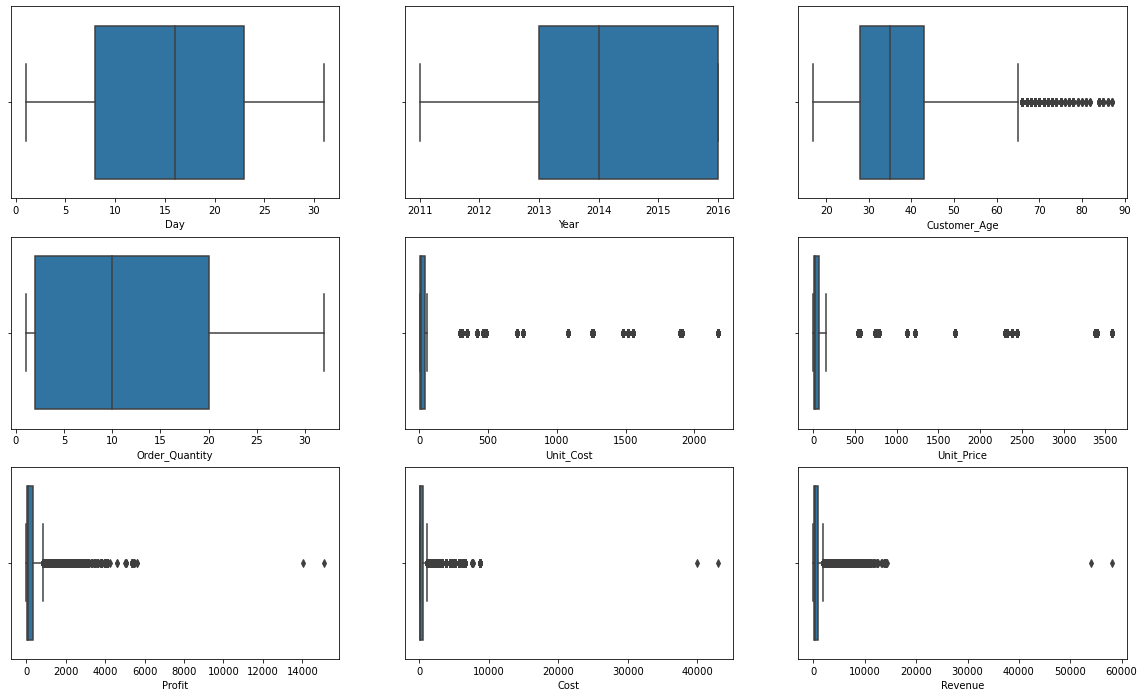

In [11]:
plt.figure(figsize=(20,12))
count=1
for i in num_cols:
    plt.subplot(3,3,count)
    sns.boxplot(df[i])
    count+=1

In [12]:
for i in cat_cols:
    print("Column:",i)
    print("."*20)
    print("Unique values:",df[i].unique())
    print("-"*100)
print("No. of categorical column:",len(cat_cols))

Column: Date
....................
Unique values: ['2013-11-26' '2015-11-26' '2014-03-23' ... '2015-01-06' '2012-02-20'
 '2011-02-20']
----------------------------------------------------------------------------------------------------
Column: Month
....................
Unique values: ['November' 'March' 'May' 'February' 'July' 'August' 'September' 'January'
 'December' 'June' 'October' 'April']
----------------------------------------------------------------------------------------------------
Column: Age_Group
....................
Unique values: ['Youth (<25)' 'Adults (35-64)' 'Young Adults (25-34)' 'Seniors (64+)']
----------------------------------------------------------------------------------------------------
Column: Customer_Gender
....................
Unique values: ['M' 'F']
----------------------------------------------------------------------------------------------------
Column: Country
....................
Unique values: ['Canada' 'Australia' 'United States' 'Germany' 'Fr

In [13]:
for i in num_cols:
    print("Column:",i)
    print("."*20)
    print("Unique values:",df[i].unique())
    print("-"*100)
print("No. of numerical column:",len(num_cols))

Column: Day
....................
Unique values: [26 23 15 22 30  2 17 27 25 13 19 11 31 28  7 24  3  4 10 12  6 20 29 16
 14 18  9  8  5  1 21]
----------------------------------------------------------------------------------------------------
Column: Year
....................
Unique values: [2013 2015 2014 2016 2012 2011]
----------------------------------------------------------------------------------------------------
Column: Customer_Age
....................
Unique values: [19 49 47 35 32 34 29 51 48 43 61 57 38 52 24 23 26 54 46 41 33 42 45 53
 21 22 67 31 37 87 25 40 44 55 50 59 17 27 28 36 56 58 30 18 62 39 64 63
 20 60 84 68 65 73 69 66 75 76 78 71 72 82 86 77 74 85 81 80 70 79]
----------------------------------------------------------------------------------------------------
Column: Order_Quantity
....................
Unique values: [ 8 23 20  4  5  2 22 21  7  1  6  9  3 24 25 10 11 12 14 28 27 15 13 17
 16 30 29 26 19 18 31 32]
-------------------------------------------

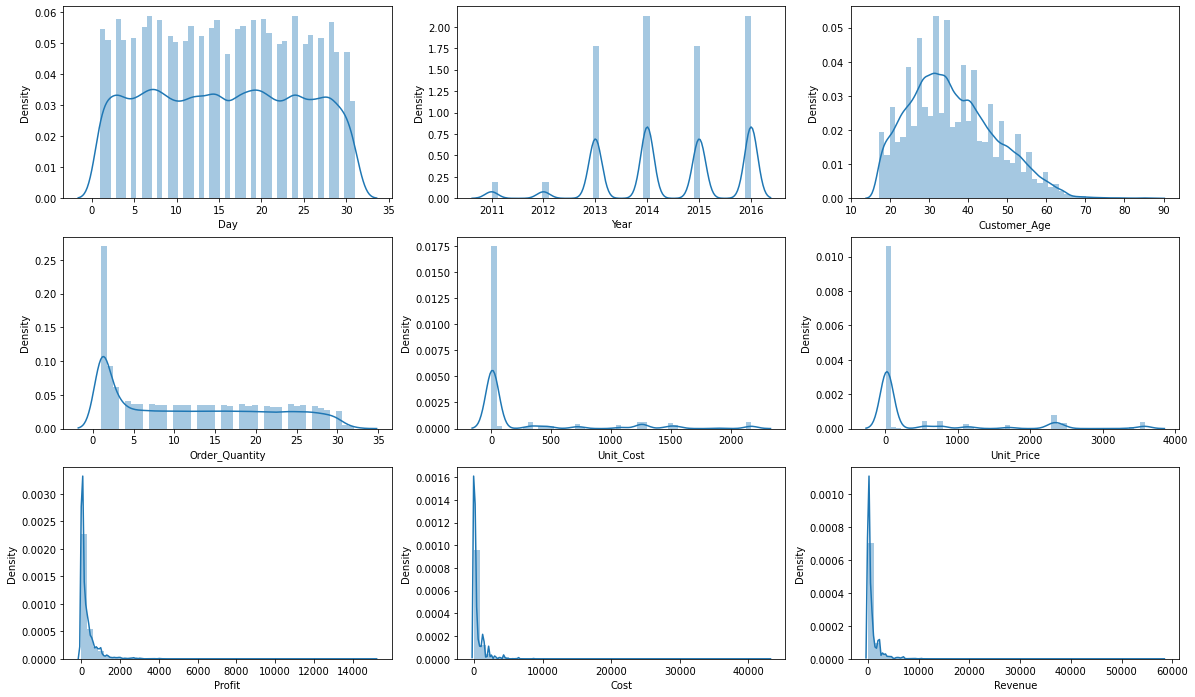

In [14]:
plt.figure(figsize=(20,12))
count=1
for i in num_cols:
    plt.subplot(3,3,count)
    sns.distplot(df[i])
    count+=1

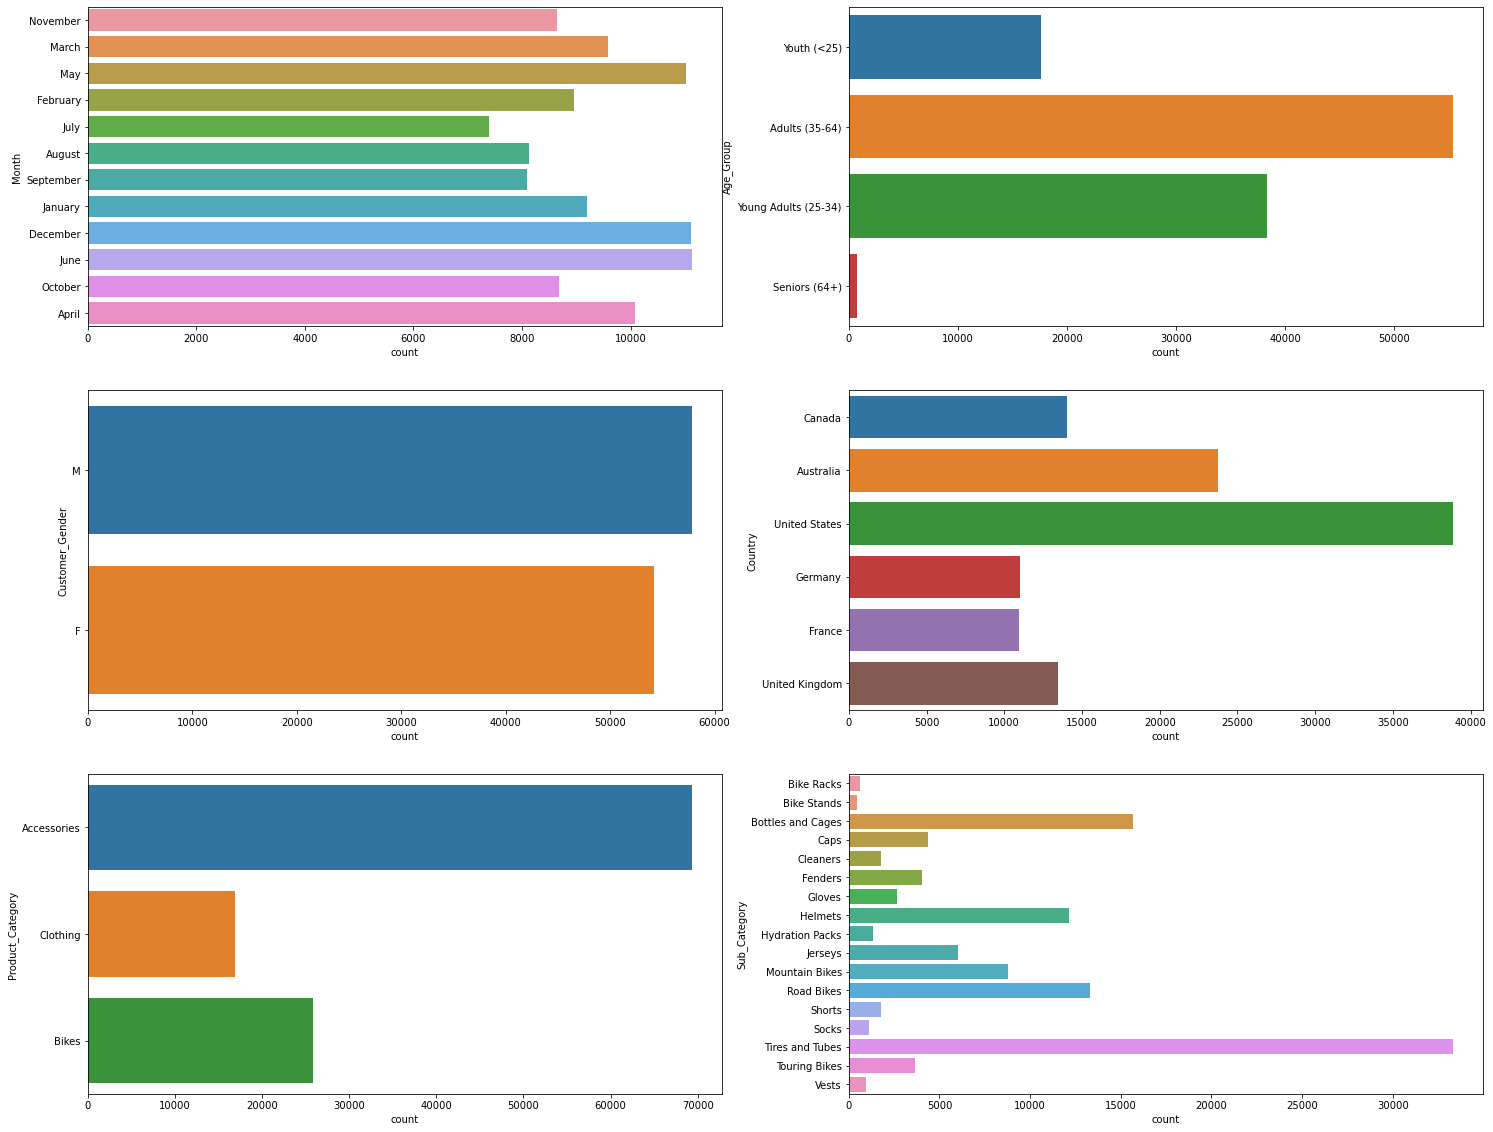

In [15]:
plt.figure(figsize=(25,20))
count=1
for i in cat_cols:
    if i!='Date' and i!='Product' and i!='State':
        plt.subplot(3,2,count)
        #plt.xticks(rotation=90)
        sns.countplot(y=df[i])
        count+=1

<AxesSubplot:xlabel='count', ylabel='Product'>

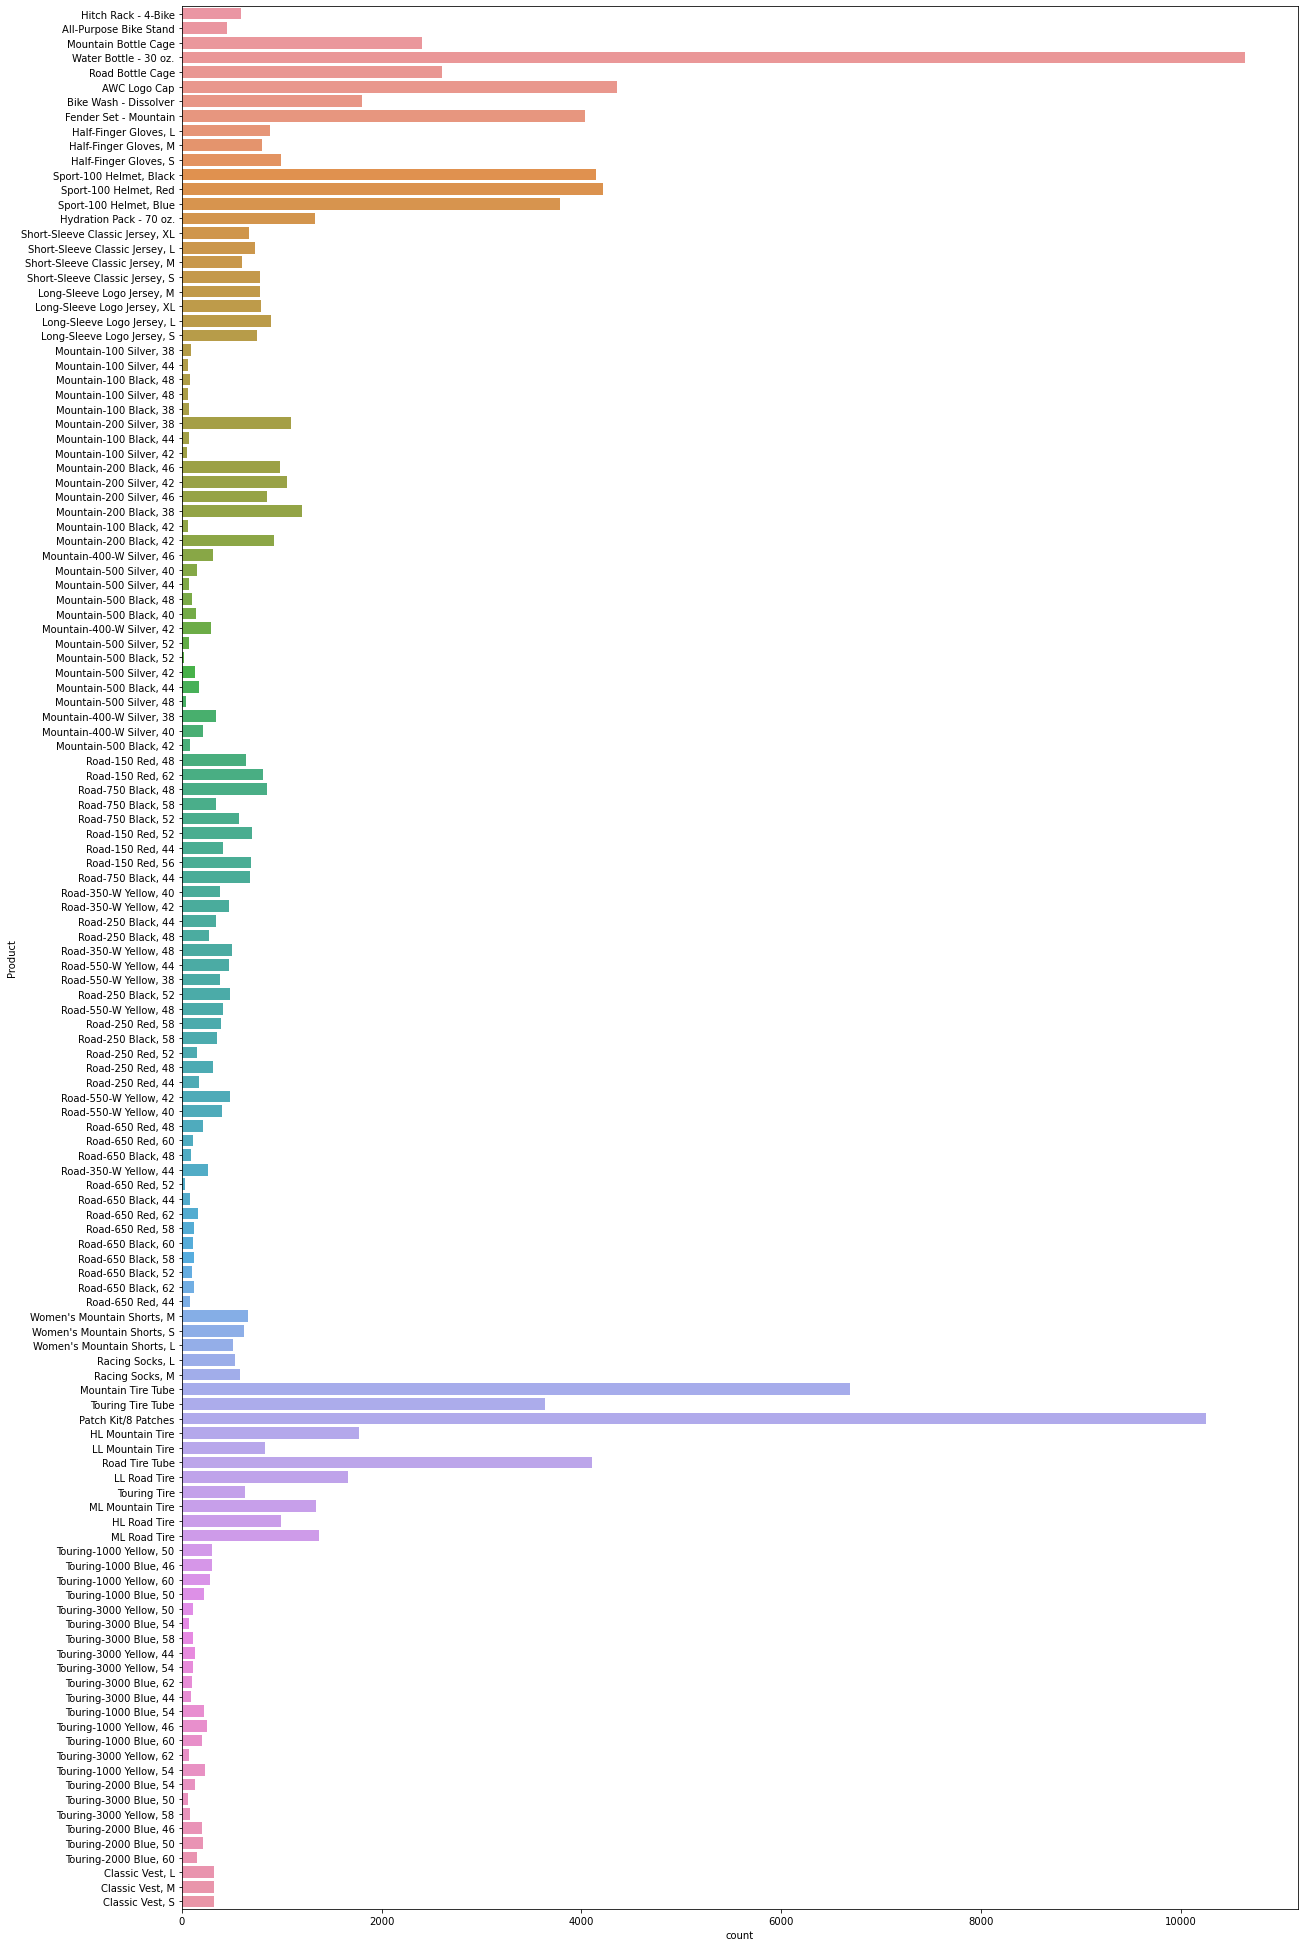

In [16]:
plt.figure(figsize=(20,35))
sns.countplot(y=df['Product'][:])

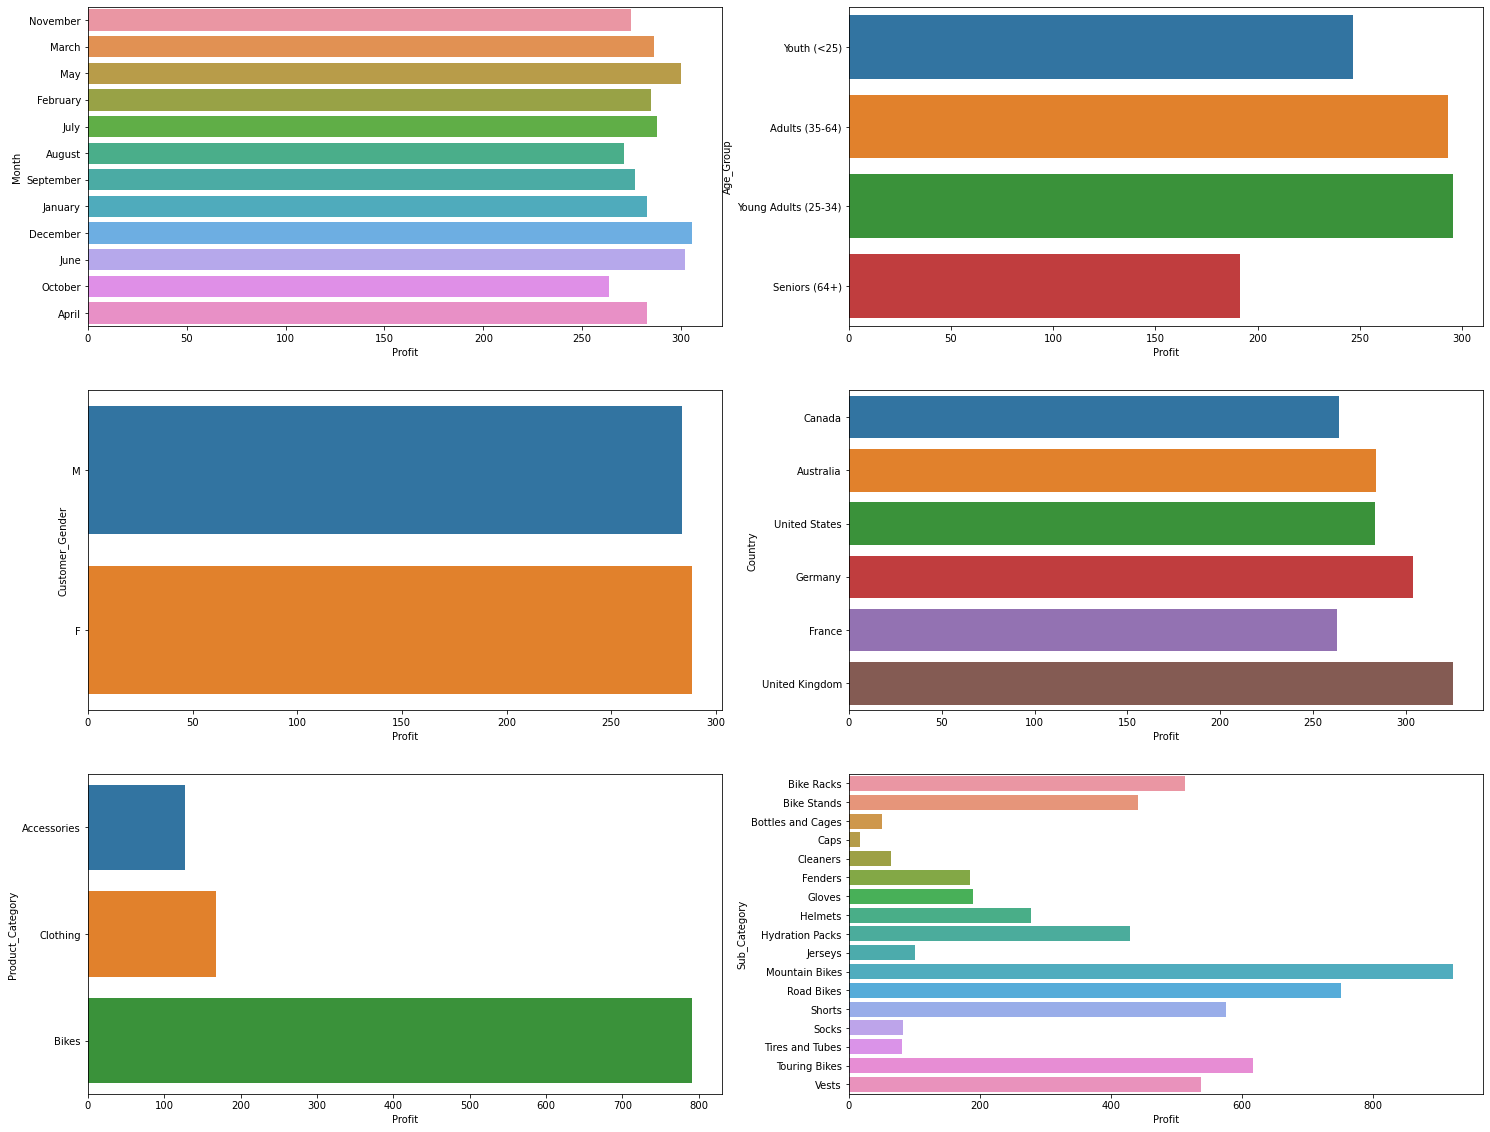

In [17]:
plt.figure(figsize=(25,20))
count=1
for i in cat_cols:
    if i!='Date' and i!='Product' and i!='State':
        plt.subplot(3,2,count)
        sns.barplot(y=df[i],x=df['Profit'],ci=False)
        count+=1

In [18]:
data=df.iloc[:,-1:-7:-1]

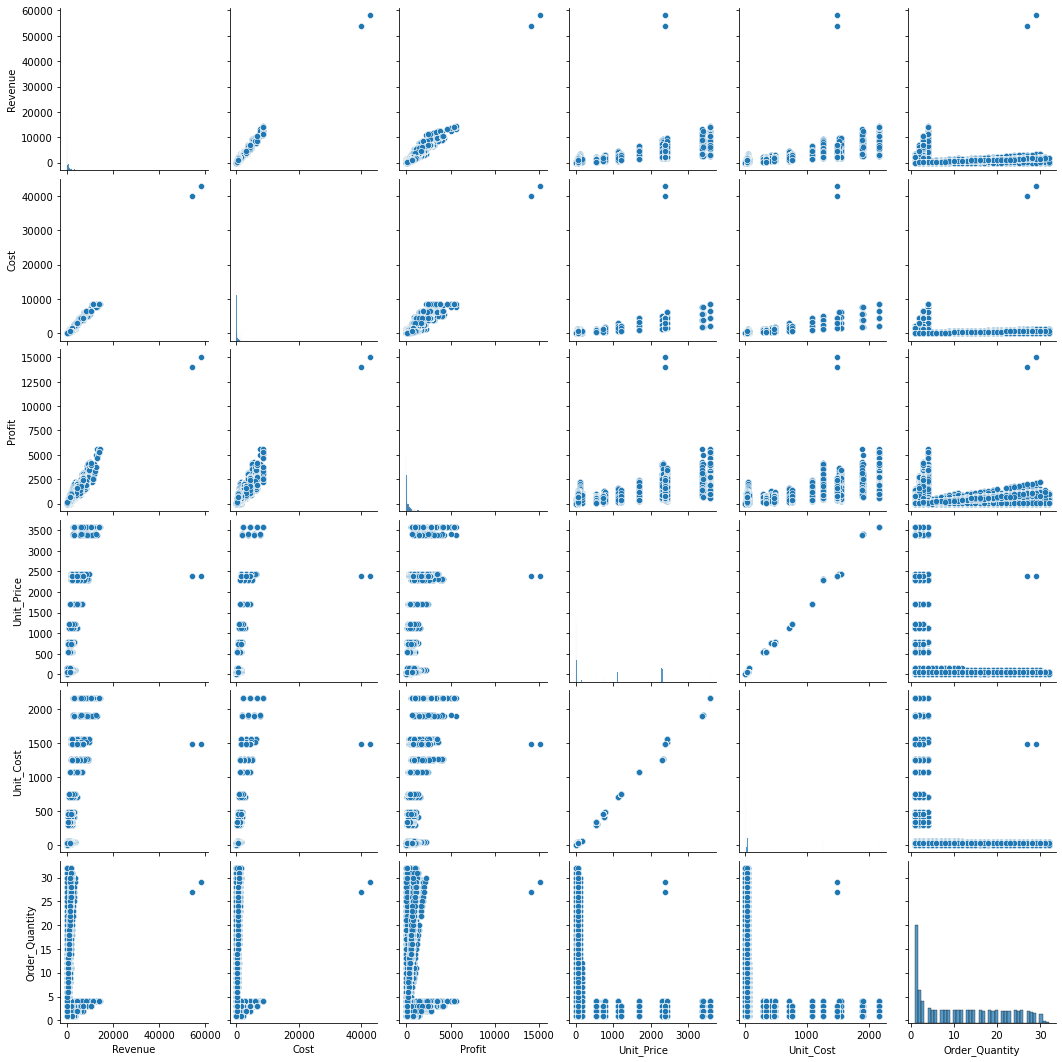

In [19]:
sns.pairplot(data=data)

<AxesSubplot:>

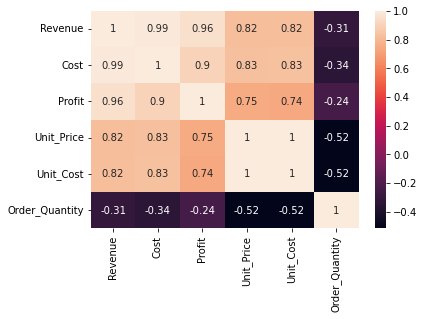

In [20]:
sns.heatmap(data.corr(),annot=True)

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [22]:
for i in cat_cols:
    df[i]=le.fit_transform(df[i])

In [23]:
x=df.drop('Profit',axis=1)
y=df['Profit']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=123)

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [27]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model1=LinearRegression()

In [30]:
from sklearn.metrics import r2_score,mean_squared_error

In [31]:
def my_model(model):
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    print("Train Data")
    print("R2 Score:",r2_score(y_train,y_pred_train))
    print("RMSE:",np.sqrt(mean_squared_error(y_train,y_pred_train)))
    print("Test Data")
    print("R2 Score:",r2_score(y_test,y_pred_test))
    print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_test)))

In [32]:
my_model(model1)

Train Data
R2 Score: 1.0
RMSE: 1.6712700345839583e-12
Test Data
R2 Score: 1.0
RMSE: 1.669107693972138e-12


In [33]:
from sklearn.linear_model import Lasso

In [34]:
for i in range(0,50,10):
    print("When alpha is:",i)
    model2=Lasso(alpha=i)
    my_model(model2)
    print("\n")

When alpha is: 0
Train Data
R2 Score: 0.9999706230118588
RMSE: 2.468862385596274
Test Data
R2 Score: 0.9999707610414827
RMSE: 2.4453065663236067


When alpha is: 10
Train Data
R2 Score: 0.9269455625476699
RMSE: 123.11658186242863
Test Data
R2 Score: 0.9280898728568722
RMSE: 121.26832885960071


When alpha is: 20
Train Data
R2 Score: 0.9201268217890294
RMSE: 128.734138756587
Test Data
R2 Score: 0.9201602506455221
RMSE: 127.77972435287039


When alpha is: 30
Train Data
R2 Score: 0.9152628693093818
RMSE: 132.59590936593787
Test Data
R2 Score: 0.9146390348947883
RMSE: 132.12409416293545


When alpha is: 40
Train Data
R2 Score: 0.9085270837959556
RMSE: 137.76519506625516
Test Data
R2 Score: 0.9072654810723345
RMSE: 137.71240922574424




In [36]:
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor()

In [37]:
my_model(model3)

Train Data
R2 Score: 0.9998830734451211
RMSE: 4.925494358402541
Test Data
R2 Score: 0.9998426872875223
RMSE: 5.671974559483439


In [38]:
import xgboost as xgb

In [39]:
model4=xgb.XGBRegressor()

In [40]:
my_model(model4)

Train Data
R2 Score: 0.9999454690665402
RMSE: 3.363680326016299
Test Data
R2 Score: 0.9998401082451415
RMSE: 5.718279761874122
